In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys

sys.path.append('../mcmcp-bigan-generator-web-service/')
from generate import floatX, load_params, _render_image

In [6]:
exp_dir = '../mcmcp-bigan-generator-web-service/exp/imagenet_1000_size72_u-200_bigan'
model_dir = '%s/models'%(exp_dir,)
weights = None
resume = 100

# load the weights
load_params(model_dir, weight_prefix=weights, resume_epoch=resume)
print("WEIGHTS LOADED...")

WEIGHTS LOADED...


In [92]:
def z_correction(z):
    z = np.array([z])
    mask = np.abs(z) > 1
    u = z[mask]
    v = -np.sign(u) * (1 - (u - np.floor(u)))
    z[mask] = v
    return z[0]

def sample_z(mean=0.0, var=1.0):
    z = np.random.normal(mean, var)
    return z_correction(z)

variance=1e-09


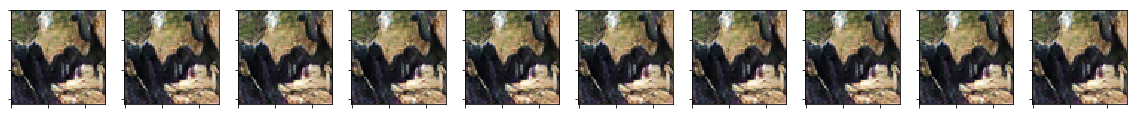

variance=0.0333333342222


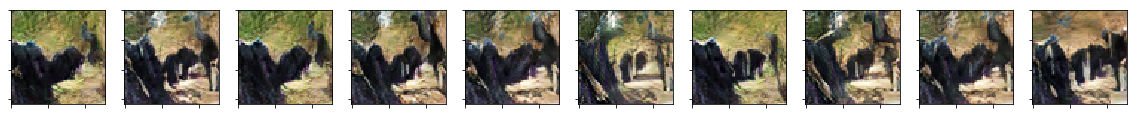

variance=0.0666666674444


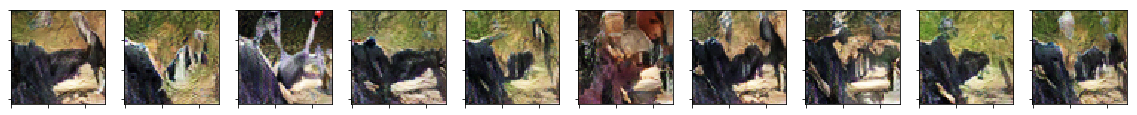

variance=0.100000000667


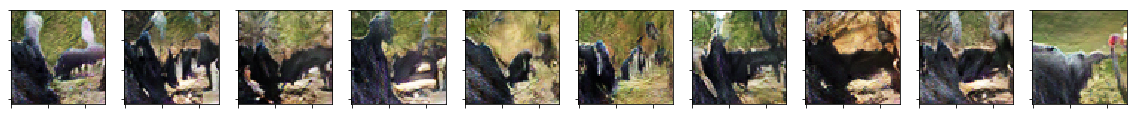

variance=0.133333333889


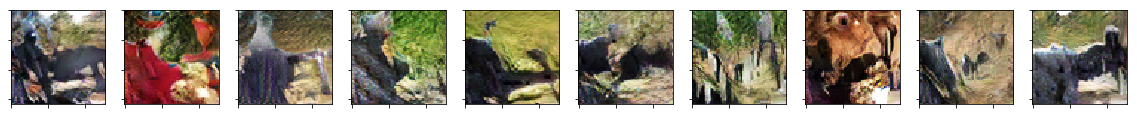

variance=0.166666667111


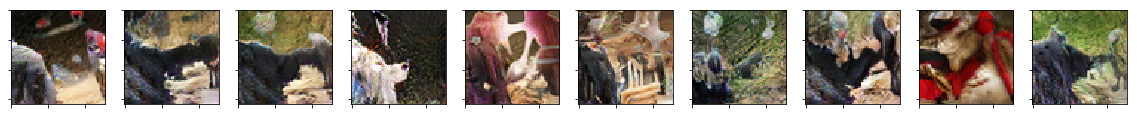

variance=0.200000000333


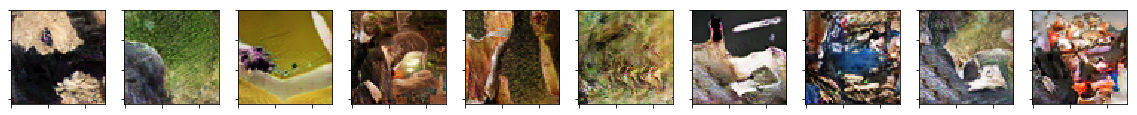

variance=0.233333333556


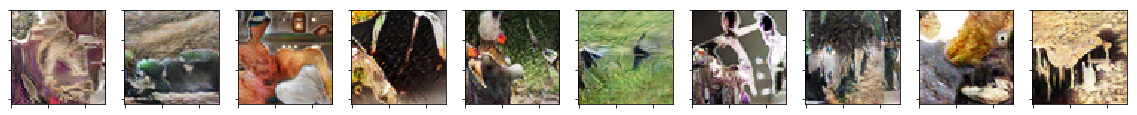

variance=0.266666666778


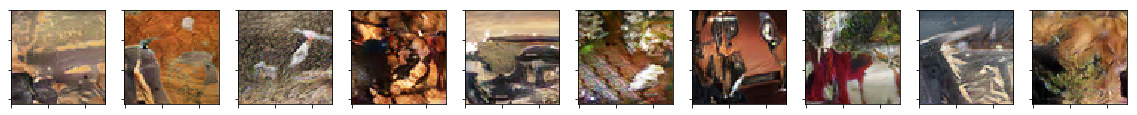

variance=0.3


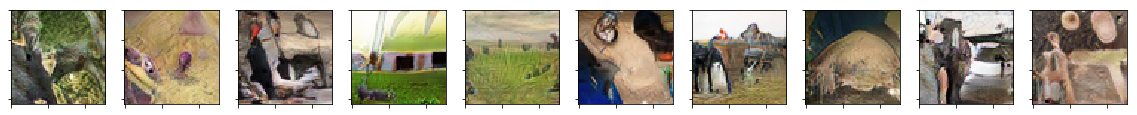

In [118]:
mean = np.random.uniform(-1, 1, size=200)

# see how samples vary with variance
for var in np.linspace(1e-9, 0.3, 10):
    print 'variance=%s'% np.mean(var)
    fig, ax = plt.subplots(1, 10, figsize=(20, 5))
    for i in range(10):
        z = sample_z(mean, var)
        img = _render_image(z)
        ax[i].imshow(img)
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
    plt.show()

dist=1e-09


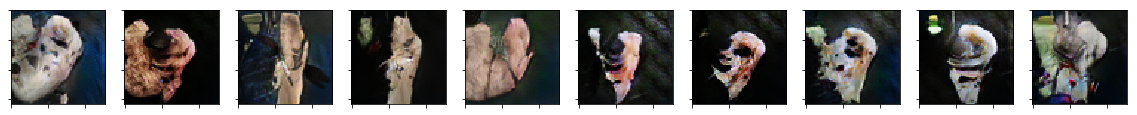

dist=1.33333333422


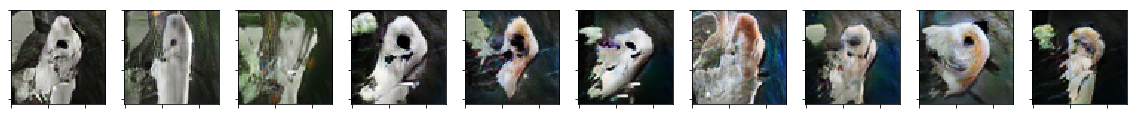

dist=2.66666666744


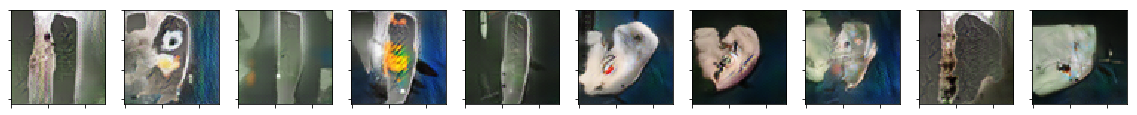

dist=4.00000000067


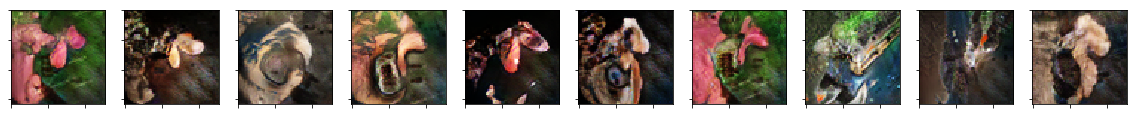

dist=5.33333333389


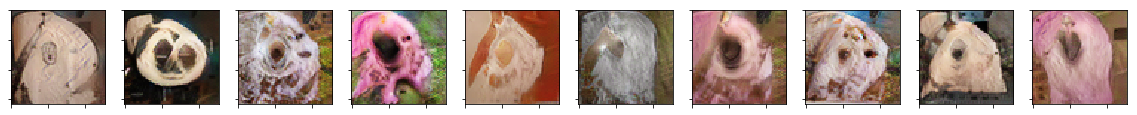

dist=6.66666666711


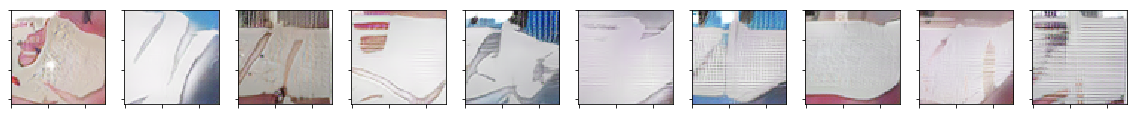

dist=8.00000000033


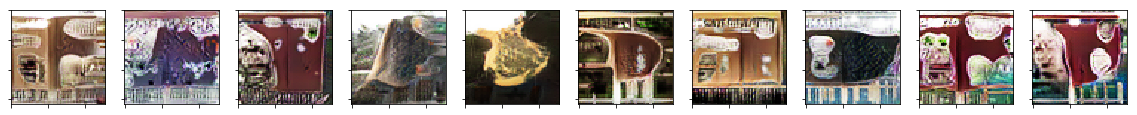

dist=9.33333333356


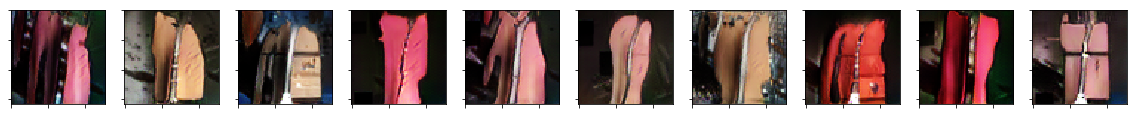

dist=10.6666666668


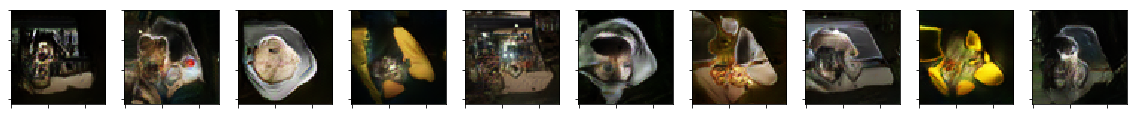

dist=12.0


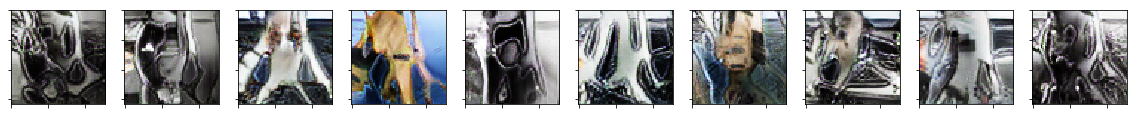

In [140]:
base_mean = np.random.uniform(-1, 1, size=200)
var = 0.1

# see how samples vary with mean distance
for dist in np.linspace(1e-9, 12, 10):
    print 'dist=%s'% np.mean(dist)
    
    delta = np.random.normal(size=200)
    delta = dist * delta / np.linalg.norm(delta)
    mean = base_mean + delta
    
    fig, ax = plt.subplots(1, 10, figsize=(20, 5))
    for i in range(10):
        z = sample_z(mean, var)
        img = _render_image(z)
        ax[i].imshow(img)
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
    plt.show()